# Riesgo de descenso y probabilidad de ascenso en LaLiga 

Se quiere conocer la probabilidad de que un club descienda a Segunda División. Sin embargo, no se disponen de datos históricos, por lo que haremos uso del web scrapping para obtenerlos e implementar un modelo

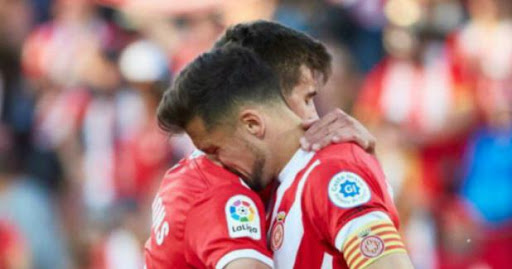

Para el modelo de **descenso** se utilizarán estas dos webs:  
1 - [Información de los clubes en cada temporada](https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2020)  
2 - [Clasificaciones históricas](https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=2020)

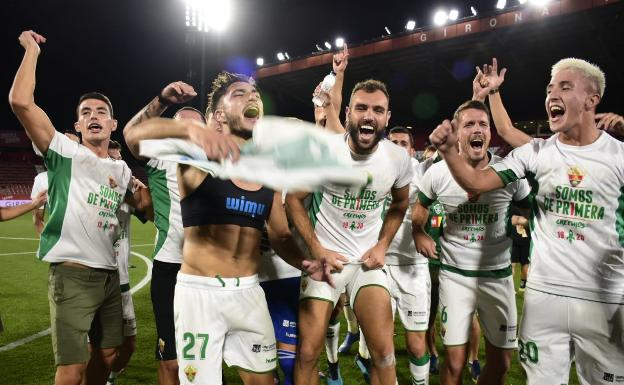

Para el modelo de **ascensos** no utilizaremos Machine Learning ("*its not always Machine Learning*"), sino que haremos una aproximación basada en la probabilidad histórica de que un club ascienda, basándonos en los años que lleva en Segunda División. Dicho de otro modo:  

¿Cuántos clubes que llevan 1 año en Segunda han ascendido?  
¿Cuántos clubes que llevan 2 años en Segunda han ascendido?  
etc.

### 1. Modelo de descenso

Con este código de web scraping se obtiene la información de los equipos en la temporada 2020-2021. 

In [1]:
import pandas as pd
import numpy as np
import requests
import time # time.sleep(0.5)

clubes = pd.DataFrame()

url = 'https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=2020'

tables = pd.read_html(requests.get(url,
                               headers={'User-agent': 'Mozilla/5.0'}).text,
                  attrs={"class":"items"})
df = tables[0]
df

,Club,Club.1,name,Equipo,Edad,Extranjeros,ø-Valor de mercado,Valor de mercado total
0,NaN,FC Barcelona,33.0,250,21,"24,77 mill. €","817,50 mill. €",NaN
1,NaN,Real Madrid CF,37.0,248,17,"21,28 mill. €","787,30 mill. €",NaN
2,NaN,Atlético de Madrid,39.0,249,21,"19,82 mill. €","773,10 mill. €",NaN
3,NaN,Sevilla FC,38.0,256,17,"11,01 mill. €","418,25 mill. €",NaN
4,NaN,Real Sociedad,38.0,247,6,"10,70 mill. €","406,60 mill. €",NaN
5,NaN,Villarreal CF,36.0,259,13,"8,13 mill. €","292,60 mill. €",NaN
6,NaN,Valencia CF,35.0,247,20,"7,97 mill. €","278,85 mill. €",NaN
7,NaN,Real Betis Balompié,33.0,268,12,"6,29 mill. €","207,70 mill. €",NaN
8,NaN,Athletic Club,32.0,259,1,"6,38 mill. €","204,15 mill. €",NaN
9,NaN,Getafe CF,33.0,254,19,"5,15 mill. €","170,10 mill. €",NaN


Modifica el código anterior para generar un único dataframe con toda la información desde la temporada 2005-06

In [10]:
clubes = pd.DataFrame()

for temporada in range(2005,2021):
    url = 'https://www.transfermarkt.es/laliga/startseite/wettbewerb/ES1/plus/?saison_id=' + str(temporada)
    tables = pd.read_html(requests.get(url,
                               headers={'User-agent': 'Mozilla/5.0'}).text,
                  attrs={"class":"items"})
    df = tables[0]
    df['Temporada'] = temporada
    clubes = pd.concat([clubes,df],axis=0)
    time.sleep(0.5)

In [11]:
clubes

,Club,Club.1,name,Equipo,Edad,Extranjeros,ø-Valor de mercado,Valor de mercado total,Temporada
0,NaN,FC Barcelona,34.0,249,15,"9,63 mill. €","327,50 mill. €",NaN,2005
1,NaN,Real Madrid CF,36.0,250,13,"7,82 mill. €","281,60 mill. €",NaN,2005
2,NaN,Valencia CF,31.0,272,14,"6,83 mill. €","211,75 mill. €",NaN,2005
3,NaN,Atlético de Madrid,31.0,240,8,"4,33 mill. €","134,15 mill. €",NaN,2005
4,NaN,RC Deportivo de La Coruña,33.0,273,8,"4,05 mill. €","133,65 mill. €",NaN,2005
...,...,...,...,...,...,...,...,...,...
16,NaN,SD Huesca,34.0,265,8,"1,89 mill. €","64,10 mill. €",NaN,2020
17,NaN,Real Valladolid CF,39.0,269,9,"1,62 mill. €","63,05 mill. €",NaN,2020
18,NaN,Cádiz CF,41.0,272,16,"1,16 mill. €","47,65 mill. €",NaN,2020
19,NaN,Elche CF,42.0,267,14,"1,09 mill. €","45,65 mill. €",NaN,2020


Limpia el dataframe y obtén uno como este
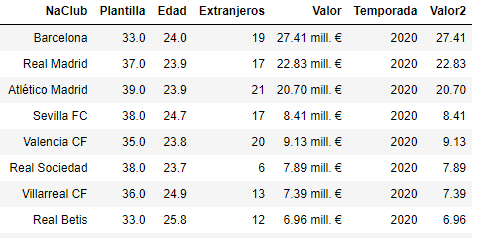

In [28]:
clubes1 = clubes.iloc[:,[1,2,3,4,5,8]]
clubes1.columns = ['NaClub','Plantilla','Edad','Extranjeros','Valor','Temporada']
clubes1 = clubes1.loc[~clubes1.Plantilla.isna()]
clubes1['ValorM'] = np.where(clubes1.Valor.str.contains('mil '),1000,1)
clubes1['Valor'] = clubes1.Valor.str.replace(',','.')
clubes1['Valor2'] = clubes1.Valor.str.extract('(^\d*.\d*)').astype('float')
clubes1['Valor2'] = clubes1['Valor2']/clubes1['ValorM']
clubes1['Edad'] = clubes1['Edad']/10
clubes1.loc[clubes1.Temporada==2020]

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2
0,FC Barcelona,33.0,25.0,21,24.77 mill. €,2020,1,24.77
1,Real Madrid CF,37.0,24.8,17,21.28 mill. €,2020,1,21.28
2,Atlético de Madrid,39.0,24.9,21,19.82 mill. €,2020,1,19.82
3,Sevilla FC,38.0,25.6,17,11.01 mill. €,2020,1,11.01
4,Real Sociedad,38.0,24.7,6,10.70 mill. €,2020,1,10.70
5,Villarreal CF,36.0,25.9,13,8.13 mill. €,2020,1,8.13
6,Valencia CF,35.0,24.7,20,7.97 mill. €,2020,1,7.97
7,Real Betis Balompié,33.0,26.8,12,6.29 mill. €,2020,1,6.29
8,Athletic Club,32.0,25.9,1,6.38 mill. €,2020,1,6.38
9,Getafe CF,33.0,25.4,19,5.15 mill. €,2020,1,5.15


Calcula, para cada temporada, el valor relativo de cada club con respecto al valor máximo.  
Primero, crea un dataframe con los valores máximos de cada temporada  
A continuación, normaliza por cada club y temporada, su valor con respecto al máximo  

In [32]:
dfVal = clubes1[['Temporada','Valor2']].groupby('Temporada',as_index=False).max()
dfVal.columns = ['Temporada','VMax']
dfVal

,Temporada,VMax
0,2005,9.63
1,2006,11.45
2,2007,13.68
3,2008,12.51
4,2009,16.63
5,2010,17.28
6,2011,17.66
7,2012,19.55
8,2013,19.17
9,2014,19.48


In [33]:
clubes1 = clubes1.merge(dfVal,how='left',left_on='Temporada',right_on='Temporada')
clubes1

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2,VMax
0,FC Barcelona,34.0,24.9,15,9.63 mill. €,2005,1,9.63,9.63
1,Real Madrid CF,36.0,25.0,13,7.82 mill. €,2005,1,7.82,9.63
2,Valencia CF,31.0,27.2,14,6.83 mill. €,2005,1,6.83,9.63
3,Atlético de Madrid,31.0,24.0,8,4.33 mill. €,2005,1,4.33,9.63
4,RC Deportivo de La Coruña,33.0,27.3,8,4.05 mill. €,2005,1,4.05,9.63
...,...,...,...,...,...,...,...,...,...
315,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,2020,1,2.28,24.77
316,SD Huesca,34.0,26.5,8,1.89 mill. €,2020,1,1.89,24.77
317,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,2020,1,1.62,24.77
318,Cádiz CF,41.0,27.2,16,1.16 mill. €,2020,1,1.16,24.77


In [34]:
clubes1['ValorRel'] = clubes1['Valor2']/clubes1['VMax']
clubes1

,NaClub,Plantilla,Edad,Extranjeros,Valor,Temporada,ValorM,Valor2,VMax,ValorRel
0,FC Barcelona,34.0,24.9,15,9.63 mill. €,2005,1,9.63,9.63,1.000000
1,Real Madrid CF,36.0,25.0,13,7.82 mill. €,2005,1,7.82,9.63,0.812046
2,Valencia CF,31.0,27.2,14,6.83 mill. €,2005,1,6.83,9.63,0.709242
3,Atlético de Madrid,31.0,24.0,8,4.33 mill. €,2005,1,4.33,9.63,0.449637
4,RC Deportivo de La Coruña,33.0,27.3,8,4.05 mill. €,2005,1,4.05,9.63,0.420561
...,...,...,...,...,...,...,...,...,...,...
315,Deportivo Alavés,35.0,25.6,10,2.28 mill. €,2020,1,2.28,24.77,0.092047
316,SD Huesca,34.0,26.5,8,1.89 mill. €,2020,1,1.89,24.77,0.076302
317,Real Valladolid CF,39.0,26.9,9,1.62 mill. €,2020,1,1.62,24.77,0.065402
318,Cádiz CF,41.0,27.2,16,1.16 mill. €,2020,1,1.16,24.77,0.046831


Con este código de web scraping, se obtiene la tabla de clasificación para la temporada 2020-21

In [35]:
url = 'https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=2020'

general = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text)
df = general[3]
df

,#,Club,Club.1,Unnamed: 3,G,E,P,Goles,+/-,Pto.
0,1,NaN,Atlético Madrid,38,26,8,4,67:25,42,86
1,2,NaN,Real Madrid,38,25,9,4,67:28,39,84
2,3,NaN,FC Barcelona,38,24,7,7,85:38,47,79
3,4,NaN,Sevilla FC,38,24,5,9,53:33,20,77
4,5,NaN,Real Sociedad,38,17,11,10,59:38,21,62
5,6,NaN,Real Betis,38,17,10,11,50:50,0,61
6,7,NaN,Villarreal CF,38,15,13,10,60:44,16,58
7,8,NaN,RC Celta,38,14,11,13,55:57,-2,53
8,9,NaN,Athletic,38,11,13,14,46:42,4,46
9,10,NaN,Granada CF,38,13,7,18,47:65,-18,46


Modifica el código anterior para generar un único dataframe con toda la información desde la temporada 2005-06

In [43]:
clasif = pd.DataFrame()

for temporada in range(2005,2021):
    url = 'https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1?saison_id=' + str(temporada)
    general = pd.read_html(requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text)
    df = general[3]
    df['Temporada'] = temporada
    clasif = pd.concat([clasif,df],axis=0)
    time.sleep(0.5)

In [44]:
clasif

,#,Club,Club.1,Unnamed: 3,G,E,P,Goles,+/-,Pto.,Temporada
0,1,NaN,FC Barcelona,38,25,7,6,80:35,45,82,2005
1,2,NaN,Real Madrid,38,20,10,8,70:40,30,70,2005
2,3,NaN,Valencia CF,38,19,12,7,58:33,25,69,2005
3,4,NaN,CA Osasuna,38,21,5,12,49:43,6,68,2005
4,5,NaN,Sevilla FC,38,20,8,10,54:39,15,68,2005
...,...,...,...,...,...,...,...,...,...,...,...
15,16,NaN,Dep. Alavés,38,9,11,18,36:57,-21,38,2020
16,17,NaN,Elche CF,38,8,12,18,34:55,-21,36,2020
17,18,NaN,SD Huesca,38,7,13,18,34:53,-19,34,2020
18,19,NaN,Real Valladolid,38,5,16,17,34:57,-23,31,2020


Limpia el dataframe y obtén uno como este
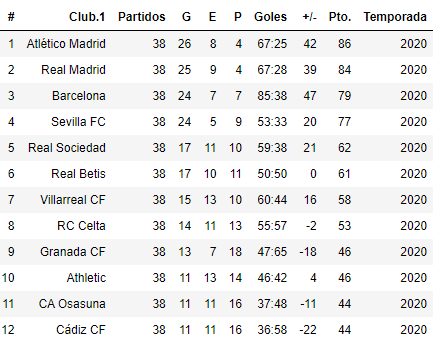

In [48]:
clasif1 = clasif.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
clasif1.columns = ['#', 'Club.1', 'Partidos', 'G', 'E', 'P', 'Goles', '+/-', 'Pto.','Temporada']
clasif1

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada
0,1,FC Barcelona,38,25,7,6,80:35,45,82,2005
1,2,Real Madrid,38,20,10,8,70:40,30,70,2005
2,3,Valencia CF,38,19,12,7,58:33,25,69,2005
3,4,CA Osasuna,38,21,5,12,49:43,6,68,2005
4,5,Sevilla FC,38,20,8,10,54:39,15,68,2005
...,...,...,...,...,...,...,...,...,...,...
15,16,Dep. Alavés,38,9,11,18,36:57,-21,38,2020
16,17,Elche CF,38,8,12,18,34:55,-21,36,2020
17,18,SD Huesca,38,7,13,18,34:53,-19,34,2020
18,19,Real Valladolid,38,5,16,17,34:57,-23,31,2020


Une ambos dataframes (información de equipo + clasificación)

In [49]:
primera = clasif1.merge(clubes1,how='left',left_on=['Club.1','Temporada'],
                       right_on=['NaClub','Temporada'])
primera

,#,Club.1,Partidos,G,E,P,Goles,+/-,Pto.,Temporada,NaClub,Plantilla,Edad,Extranjeros,Valor,ValorM,Valor2,VMax,ValorRel
0,1,FC Barcelona,38,25,7,6,80:35,45,82,2005,FC Barcelona,34.0,24.9,15.0,9.63 mill. €,1.0,9.63,9.63,1.000000
1,2,Real Madrid,38,20,10,8,70:40,30,70,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Valencia CF,38,19,12,7,58:33,25,69,2005,Valencia CF,31.0,27.2,14.0,6.83 mill. €,1.0,6.83,9.63,0.709242
3,4,CA Osasuna,38,21,5,12,49:43,6,68,2005,CA Osasuna,25.0,26.0,7.0,1.63 mill. €,1.0,1.63,9.63,0.169263
4,5,Sevilla FC,38,20,8,10,54:39,15,68,2005,Sevilla FC,34.0,25.5,11.0,2.85 mill. €,1.0,2.85,9.63,0.295950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,16,Dep. Alavés,38,9,11,18,36:57,-21,38,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,17,Elche CF,38,8,12,18,34:55,-21,36,2020,Elche CF,42.0,26.7,14.0,1.09 mill. €,1.0,1.09,24.77,0.044005
317,18,SD Huesca,38,7,13,18,34:53,-19,34,2020,SD Huesca,34.0,26.5,8.0,1.89 mill. €,1.0,1.89,24.77,0.076302
318,19,Real Valladolid,38,5,16,17,34:57,-23,31,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Genera el dataset para implementar un modelo, con las siguientes columnas: 
* Temporada
* Equipo
* Valor relativo
* Valor relativo de la temporada anterior
* Valor relativo medio de las últimas dos temporadas
* Variación del valor con la temporada anterior: (Valor-Valor_1)/Valor_1
* Posición del año anterior
* Porcentaje de veces que ha estado en Primera
* Posición media en sus años en Primera
* Recién ascendido (Sí/No)
* Diferencia de goles en la temporada anterior
* Jugadores en la plantilla
* Edad media
* Número de extranjeros
* Descenso (target)

Limpia el dataset anterior y comprueba que es correcto

Realiza la división train-test, selecciona las variables, entrena un modelo y mide el desempeño.   
¿Qué equipos tienen más probabilidad de descender?

### Sub-modelo para predecir missings 

#### Modelado 

In [ ]:
# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

correlation = pd.concat([X_train,y_train],axis=1).corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
# Importancia de variables


In [ ]:
# Balancear 


Calcula la probabilidad de descenso para la temporada 2021/22

Transforma los scores del modelo a probabilidades reales

$$\LARGE P = \frac{P_{mod}\cdot (\frac{P_{desbal}}{P_{bal}})}{P_{mod}\cdot \frac{P_{desbal}}{P_{bal}}+(1-P_{mod})\cdot\frac{1-P_{desbal}}{1-P_{bal}}}$$
donde

$$P_{mod}= \text{Score del modelo}$$
$$P_{des}= \text{Ratio desbalance}$$
$$P_{bal}= 0.5$$

In [ ]:
# Predecir missings en DiffGoles_1


### 2. Modelo de ascenso 

Utilizando el mismo dataset anterior, genera un dataframe que indique, para cada equipo descendido, cuánto tiempo tardó en volver a primera división (si es que volvió). Por ejemplo, el Rayo Vallecano desdenció en la temporada 2015-16 y volvió a Primera en la temporada 2018-19 (pasó dos años en "el infierno") 

Dibuja la curva de probabilidad de ascenso en función de los años que un equipo pase en segunda división

In [ ]:
# Probabilidad de estar un año en 2º


In [ ]:
# Probabilidad de estar dos años en 2º


In [ ]:
# Probabilidad de estar tres años en 2º


In [ ]:
# Probabilidad de estar cuatro años en 2º


In [ ]:
# Probabilidad de estar cinco años en 2º


In [ ]:
# Probabilidad de estar seis años en 2º
